# 3. Language Identification with Naive Bayes

## 3.1

In [1]:
import os
import numpy as np

# English
e_data = []
for fileSuffix in range(0, 10):
    fileName = 'e' + str(fileSuffix) + '.txt'
    with open(os.path.join('languageID', fileName), 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if len(line) > 0:
                e_data.append(line)

# Japanese
j_data = []
for fileSuffix in range(0, 10):
    fileName = 'j' + str(fileSuffix) + '.txt'
    with open(os.path.join('languageID', fileName), 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if len(line) > 0:
                j_data.append(line)

# Spanish
s_data = []
for fileSuffix in range(0, 10):
    fileName = 's' + str(fileSuffix) + '.txt'
    with open(os.path.join('languageID', fileName), 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if len(line) > 0:
                s_data.append(line)

total_len = len(e_data) + len(j_data) + len(s_data)

prior_e = (len(e_data) + 0.5) / (total_len + (3*0.5))
prior_j = (len(j_data) + 0.5) / (total_len + (3*0.5))
prior_s = (len(s_data) + 0.5) / (total_len + (3*0.5))

priorProbs = np.array([prior_e, prior_j, prior_s])
logPriorProbs = np.log(priorProbs)

print("Prior probability p(y = e): ", prior_e)
print("Prior probability p(y = j): ", prior_j)
print("Prior probability p(y = s): ", prior_s)

Prior probability p(y = e):  0.10967741935483871
Prior probability p(y = j):  0.7382488479262673
Prior probability p(y = s):  0.15207373271889402


## 3.2

In [2]:
count_e = np.array([0 for _ in range(27)])
count_j = np.array([0 for _ in range(27)])
count_s = np.array([0 for _ in range(27)])

# English
for line in e_data:
    for c in line:
        idx = ord(c)
        if 97<=idx and idx<=122:
            idx -= 97
        elif idx==32:
            idx=26
        else:
            continue
        count_e[idx] += 1

probs_e = (count_e + 0.5) / (np.sum(count_e) + (27*0.5))
logProbs_e = np.log(probs_e)
print("Probabilities for English: ", probs_e)

Probabilities for English:  [0.06024017 0.01114824 0.02153561 0.02199874 0.10549472 0.01895531
 0.01749975 0.04727249 0.05547653 0.00142248 0.00373813 0.02901188
 0.02054319 0.05799067 0.06454067 0.01677197 0.00056237 0.05388865
 0.06626088 0.08022098 0.02669622 0.00929571 0.0155149  0.00115783
 0.01386086 0.00062854 0.17827252]


## 3.3

In [3]:
# Japanese
for line in j_data:
    for c in line:
        idx = ord(c)
        if 97<=idx and idx<=122:
            idx -= 97
        elif idx==32:
            idx=26
        else:
            continue
        count_j[idx] += 1

probs_j = (count_j + 0.5) / (np.sum(count_j) + (27*0.5))
logProbs_j = np.log(probs_j)
print("Probabilities for Japanese: ", probs_j)

Probabilities for Japanese:  [1.34175414e-01 1.10656467e-02 5.58619463e-03 1.75413627e-02
 6.13058175e-02 3.94947518e-03 1.42679239e-02 3.23429995e-02
 9.88080413e-02 2.38391745e-03 5.84593489e-02 1.45881516e-03
 4.05265967e-02 5.77477317e-02 9.28304572e-02 8.89521437e-04
 1.06742572e-04 4.35865504e-02 4.29460950e-02 5.80323786e-02
 7.19089130e-02 2.49066002e-04 2.01031845e-02 3.55808575e-05
 1.44102473e-02 7.86336951e-03 1.07418609e-01]


In [4]:
# Spanish
for line in s_data:
    for c in line:
        idx = ord(c)
        if 97<=idx and idx<=122:
            idx -= 97
        elif idx==32:
            idx=26
        else:
            continue
        count_s[idx] += 1

probs_s = (count_s + 0.5) / (np.sum(count_s) + (27*0.5))
logProbs_s = np.log(probs_s)
print("Probabilities for Spanish: ", probs_s)

Probabilities for Spanish:  [1.04831978e-01 8.25424305e-03 3.76232726e-02 3.98491359e-02
 1.14106409e-01 8.62522027e-03 7.20314094e-03 4.54447089e-03
 4.99891798e-02 6.64667512e-03 2.78232912e-04 5.30806566e-02
 2.58756608e-02 5.43172473e-02 7.26806195e-02 2.43299224e-02
 7.69777723e-03 5.94490988e-02 6.59412001e-02 3.57065570e-02
 3.37898414e-02 5.90472069e-03 9.27443040e-05 2.50409621e-03
 7.88326584e-03 2.68958481e-03 1.66105048e-01]


## 3.4

In [5]:
count_e10 = np.array([0 for _ in range(27)])

with open(os.path.join('languageID', 'e10.txt'), 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if len(line) > 0:
            for c in line:
                idx = ord(c)
                if 97<=idx and idx<=122:
                    idx -= 97
                elif idx==32:
                    idx=26
                else:
                    continue
                count_e10[idx] += 1

print("Bag of words vector: ", count_e10)

Bag of words vector:  [164  32  53  57 311  55  51 140 140   3   6  85  64 139 182  53   3 141
 186 225  65  31  47   4  38   2 492]


## 3.5

In [6]:
# For English
logP_e = 0
for i, c in enumerate(count_e10):
    logP_e += (logProbs_e[i] * c)

print("Logprob: p(x | y=e): ", logP_e)

# For Japanese
logP_j = 0
for i, c in enumerate(count_e10):
    logP_j += (logProbs_j[i] * c)

print("Logprob: p(x | y=j): ", logP_j)

# For Spanish
logP_s = 0
for i, c in enumerate(count_e10):
    logP_s += (logProbs_s[i] * c)

print("Logprob: p(x | y=s): ", logP_s)

Logprob: p(x | y=e):  -7831.531702560014
Logprob: p(x | y=j):  -8786.051104707092
Logprob: p(x | y=s):  -8457.039705604957


## 3.6

In [7]:
posteriorLogP_e = logP_e + logPriorProbs[0]
posteriorLogP_j = logP_j + logPriorProbs[1]
posteriorLogP_s = logP_s + logPriorProbs[2]

print("Posterior log probability for English: ", posteriorLogP_e)
print("Posterior log probability for Japanese: ", posteriorLogP_j)
print("Posterior log probability for Spanish: ", posteriorLogP_s)

Posterior log probability for English:  -7833.741914332877
Posterior log probability for Japanese:  -8786.354579025998
Posterior log probability for Spanish:  -8458.923095397031


## 3.7

In [8]:
confusion_matrix = np.zeros((3, 3))

for i, prefix in enumerate(('e', 'j', 's')):
    for suffix in range(10, 20):
        filename = prefix + str(suffix) + '.txt'
        counts = np.array([0 for _ in range(27)])
        with open(os.path.join('languageID', filename), 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if len(line) > 0:
                    for c in line:
                        idx = ord(c)
                        if 97<=idx and idx<=122:
                            idx -= 97
                        elif idx==32:
                            idx=26
                        else:
                            continue
                        counts[idx] += 1
        logProbs = np.zeros((3))
        for j, c in enumerate(counts):
            logProbs[0] += (logProbs_e[j] * c)
            logProbs[1] += (logProbs_j[j] * c)
            logProbs[2] += (logProbs_s[j] * c)

        for j in range(3):
            logProbs[j] += logPriorProbs[j]

        k = np.argmax(logProbs)
        confusion_matrix[i][k] += 1

print("Confusion Matrix: ")
print(confusion_matrix)

Confusion Matrix: 
[[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]


---

# 4. Simple Feed-Forward Network

## 4.2

In [33]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [34]:
import torch
import torch.nn

d = 28*28
d1 = 300
d2 = 200
k = 10

x_train = x_train * 1.0 / 256
x_test = x_test * 1.0 / 256

x_train = torch.flatten(torch.from_numpy(x_train), 1, 2)
x_test = torch.flatten(torch.from_numpy(x_test), 1, 2)
print(x_train.shape, x_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784])


In [35]:
y_train = torch.tensor([[1 if idx == y else 0 for idx in range(10)] for y in y_train])
y_test = torch.tensor([[1 if idx == y else 0 for idx in range(10)] for y in y_test])
print(y_train.shape, y_test.shape)

torch.Size([60000, 10]) torch.Size([10000, 10])


In [98]:
def compute_loss(x, y, W1, W2):
    # print(x.shape, W1.shape, W2.shape, y.shape)
    x = torch.reshape(x, (x.shape[0], x.shape[1], 1))
    # print("x: ", x.shape)
    # print(torch.max(x))
    a = torch.matmul(W1, x.float())
    # print(a[0, 200:300])
    # print(a[1, 200:300])
    # print("a: ", a.shape)
    h = torch.sigmoid(a)
    # print(torch.sigmoid(torch.tensor([52])))
    # print(h[0, 200:300])
    # print(h[1, 200:300])
    # print("h: ", h.shape)
    t = W2 @ h
    t = torch.reshape(t, (t.shape[0], t.shape[1]))
    # print("t: ", t.shape)
    y_hat = torch.nn.functional.softmax(t, dim=1)
    # print("y_hat: ", y_hat.shape)
    prod = y * torch.log(y_hat)
    # print("prod: ", prod.shape)
    loss = torch.sum(prod, axis=1)
    # print("loss: ", loss.shape)
    return torch.sum(loss)/x.shape[0], y_hat, h


def compute_grads(y, y_hat, h, W2, x):
    f = torch.sum(y/y_hat, axis = 1)
    a = y_hat * (1 - y_hat)
    b = h * (1 - h)
    g1 = torch.reshape(a, (a.shape[0], a.shape[1], 1)) @ torch.transpose(h, 1, 2)
    f1 = f[:, None, None]
    grad_W2 = torch.sum(f1 * g1, dim=0) / x.shape[0]
    g2 = a @ W2
    g2 = g2[:, :, None]
    x1 = x[:, :, None]
    x1 = torch.transpose(x1, dim0=1, dim1=2)
    g3 = torch.matmul((g2 * b), x1.float())
    grad_W1 = torch.sum(f1 * g3, dim=0) / x.shape[0]
    return grad_W1, grad_W2

W1 = torch.rand(d1, d, dtype=torch.float32)
W2 = torch.rand(k, d1, dtype=torch.float32)
l, y_hat, h = compute_loss(x_train[:5], y_train[:5], W1, W2)
# compute_grads(y_train[:5], y_hat, h, W2, x_train[:5])

In [103]:
ds = torch.utils.data.TensorDataset(x_train, y_train)
dl = torch.utils.data.DataLoader(ds, batch_size = 64, shuffle = True)

torch.manual_seed(760)
W1 = torch.zeros(d1, d, dtype=torch.float32)
W2 = torch.zeros(k, d1, dtype=torch.float32)
lr = 0.01

print("W1: ", W1.shape, "; W2: ", W2.shape)

loss = None

for epoch in range(200):
    for x, y in dl:
        loss, y_hat, h = compute_loss(x, y, W1, W2)
        grad_W1, grad_W2 = compute_grads(y, y_hat, h, W2, x)
        # print("GW1: ", grad_W1.shape, "; GW2: ", grad_W2.shape)
        W1 += (lr * grad_W1)
        W2 += (lr * grad_W2)
    if epoch%10 == 0:
        print("Loss after ", epoch+1, " epochs: ", loss)

W1:  torch.Size([300, 784]) ; W2:  torch.Size([10, 300])
Loss after  1  epochs:  tensor(nan)


KeyboardInterrupt: 

## 4.3

In [105]:
class MyNN(torch.nn.Module):
    def __init__(self, d, d1, k):
        super(MyNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Linear(d, d1),
            torch.nn.Sigmoid()
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Linear(d1, k),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        o = self.layer1(x)
        o = self.layer2(o)
        return o

In [112]:
class Loss(torch.nn.Module):
    def __init__(self):
        super(Loss, self).__init__()

    def forward(self, y, y_hat):
        loss = torch.sum(y * torch.log(y_hat))
        return -loss

In [113]:
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

trl = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
tsl = torch.utils.data.DataLoader(test_dataset, batch_size = 64)

In [127]:
model = MyNN(d, d1, k)
criterion = Loss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = []
accuracies = []

for epoch in range(60):
    model.train()

    for x, y in trl:
        optimizer.zero_grad()
        y_hat = model(x.float())
        loss = criterion(y, y_hat)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x_t, y_t in tsl:
                y_t_hat = model(x_t.float())
                loss = criterion(y_t, y_t_hat)
                _, predicted = y_t_hat.max(1)
                labels = torch.argmax(y_t, dim=1)
                total += y_t.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct/total
        epochs.append(epoch)
        accuracies.append(accuracy)

        print("Epoch: ", epoch+1, "; Accuracy: ", accuracy, "; Errors: ", (1-accuracy)*100, "%")

Epoch:  10 ; Accuracy:  0.9765 ; Errors:  2.3499999999999965 %
Epoch:  20 ; Accuracy:  0.9809 ; Errors:  1.9100000000000006 %
Epoch:  30 ; Accuracy:  0.9823 ; Errors:  1.770000000000005 %
Epoch:  40 ; Accuracy:  0.9816 ; Errors:  1.8399999999999972 %
Epoch:  50 ; Accuracy:  0.9819 ; Errors:  1.8100000000000005 %
Epoch:  60 ; Accuracy:  0.9818 ; Errors:  1.8199999999999994 %


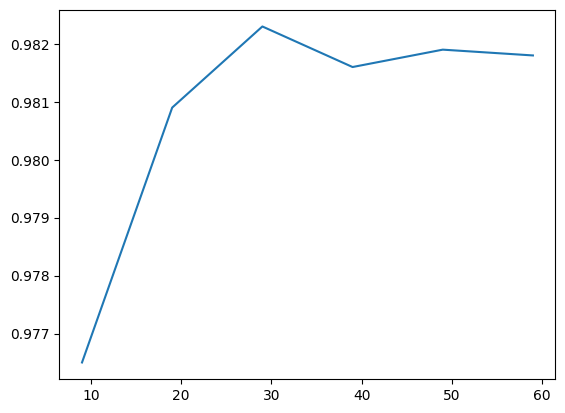

In [128]:
import matplotlib.pyplot as plt

plt.plot(epochs, accuracies)
plt.show()

## 4.4

### Initialize weights to zero

In [150]:
import torch.nn.init as init

class ZeroWNN(torch.nn.Module):
    def __init__(self, d, d1, k):
        super(ZeroWNN, self).__init__()
        linear1 = torch.nn.Linear(d, d1)
        linear2 = torch.nn.Linear(d1, k)
        linear1.weight.data.fill_(0)
        linear2.weight.data.fill_(0)

        self.layer1 = torch.nn.Sequential(
            linear1,
            torch.nn.Sigmoid()
        )
        self.layer2 = torch.nn.Sequential(
            linear2,
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        o = self.layer1(x)
        o = self.layer2(o)
        return o

In [152]:
model = ZeroWNN(d, d1, k)
criterion = Loss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epochs = []
accuracies = []

for epoch in range(60):
    model.train()

    for x, y in trl:
        optimizer.zero_grad()
        y_hat = model(x.float())
        loss = criterion(y, y_hat)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x_t, y_t in tsl:
                y_t_hat = model(x_t.float())
                loss = criterion(y_t, y_t_hat)
                _, predicted = y_t_hat.max(1)
                labels = torch.argmax(y_t, dim=1)
                total += y_t.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct/total
        epochs.append(epoch)
        accuracies.append(accuracy)

        print("Epoch: ", epoch+1, "; Accuracy: ", accuracy, "; Errors: ", (1-accuracy)*100, "%")

Epoch:  10 ; Accuracy:  0.9168 ; Errors:  8.320000000000006 %
Epoch:  20 ; Accuracy:  0.9315 ; Errors:  6.8500000000000005 %
Epoch:  30 ; Accuracy:  0.9464 ; Errors:  5.359999999999998 %
Epoch:  40 ; Accuracy:  0.9564 ; Errors:  4.359999999999998 %
Epoch:  50 ; Accuracy:  0.9607 ; Errors:  3.93 %
Epoch:  60 ; Accuracy:  0.9648 ; Errors:  3.520000000000001 %


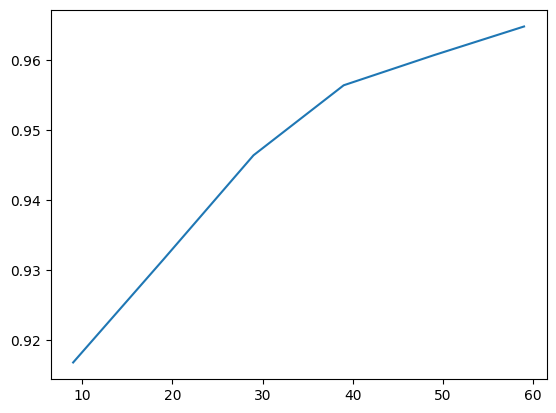

In [153]:
plt.plot(epochs, accuracies)
plt.show()

### Initialize weights randomly

In [145]:
import torch.nn.init as init

class RandWNN(torch.nn.Module):
    def __init__(self, d, d1, k):
        super(RandWNN, self).__init__()
        linear1 = torch.nn.Linear(d, d1)
        linear2 = torch.nn.Linear(d1, k)
        linear1.weight.data.uniform_(-1,1 )
        linear2.weight.data.uniform_(-1,1 )

        self.layer1 = torch.nn.Sequential(
            linear1,
            torch.nn.Sigmoid()
        )
        self.layer2 = torch.nn.Sequential(
            linear2,
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        o = self.layer1(x)
        o = self.layer2(o)
        return o

In [148]:
model = ZeroWNN(d, d1, k)
criterion = Loss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = []
accuracies = []

for epoch in range(60):
    model.train()

    for x, y in trl:
        optimizer.zero_grad()
        y_hat = model(x.float())
        loss = criterion(y, y_hat)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x_t, y_t in tsl:
                y_t_hat = model(x_t.float())
                loss = criterion(y_t, y_t_hat)
                _, predicted = y_t_hat.max(1)
                labels = torch.argmax(y_t, dim=1)
                total += y_t.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct/total
        epochs.append(epoch)
        accuracies.append(accuracy)

        print("Epoch: ", epoch+1, "; Accuracy: ", accuracy, "; Errors: ", (1-accuracy)*100, "%")

Epoch:  10 ; Accuracy:  0.9627 ; Errors:  3.73 %
Epoch:  20 ; Accuracy:  0.9685 ; Errors:  3.1499999999999972 %
Epoch:  30 ; Accuracy:  0.9699 ; Errors:  3.0100000000000016 %
Epoch:  40 ; Accuracy:  0.9708 ; Errors:  2.9200000000000004 %
Epoch:  50 ; Accuracy:  0.9717 ; Errors:  2.829999999999999 %
Epoch:  60 ; Accuracy:  0.9714 ; Errors:  2.859999999999996 %


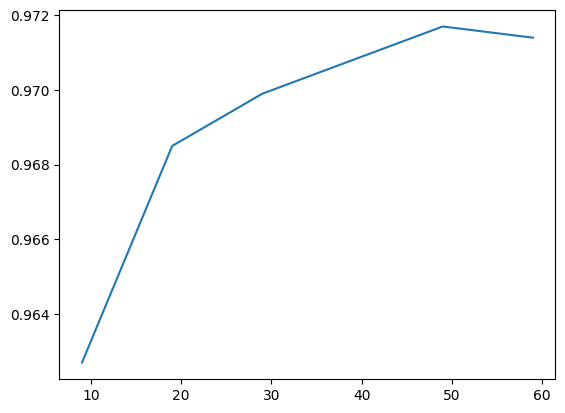

In [149]:
plt.plot(epochs, accuracies)
plt.show()